In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

The nltk version is 3.5.
The scikit-learn version is 0.24.2.


## Reading Data

In [3]:
train_df = pd.read_csv("train_ctrUa4K.csv")
test_df = pd.read_csv("test_lAUu6dG.csv")
test_copy = test_df.copy()
sample_sub = pd.read_csv("sample_submission_49d68Cx.csv")


# Deducing information about data

In [4]:
train_df.info()
train_df.describe()
train_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


##### Now that we know, not all features are numerical, there are categorical features as well in our train data. We can also figure out that we have some missing values in the train data that we need to take care of. We know that out target variable is Loan_Status

##### Let's count the value we have for our target variables

In [5]:
train_df.Loan_Status.value_counts()
train_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

We have 422 yes values and 192 no values so we can deduce from here that we have more yes values than we have no values.
Let's plot the graph to have a better look at it

<AxesSubplot:>

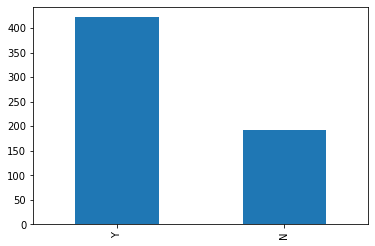

In [6]:
train_df["Loan_Status"].value_counts().plot.bar() # important to put brackets in value counts

Let's do some univariate analysis, that is anlayse the target variable

#### In here we have three kind of variables:
1. Numerical Variable
2. Categorical Varible
3. Ordinal Varible
Let's analyze each of them individually

In [7]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
plt.figure(figsize=(10,10)) 
plt.subplot(221) 
train_df["Gender"].value_counts().plot(kind = "bar", title = "Gender")
plt.subplot(222)
train_df.Married.value_counts().plot(kind = "bar", title = "Marital Status")
plt.subplot(223)
train_df.Credit_History.value_counts().plot(kind = "bar", title = "Credit_History")
plt.subplot(224)
train_df.Self_Employed.value_counts().plot(kind = "bar", title = "Self_Employed")

It can be inferred from above that more than 80% people are male, aboute 70% people are married who applied for the loan, more than 80% people who applied, have a history that they were able to clear the loan, about the same population are not self employed.

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
train_df.Property_Area.value_counts().plot(kind = "bar", title = "Property_Area")
plt.subplot(222)
train_df.Education.value_counts().plot(kind = "bar", title = "Education")
plt.subplot(223)
train_df.Dependents.value_counts().plot(kind = "bar", title = "Dependents")
plt.subplot(224)

From here we can infer that more people are from semiurban than urban than rural. More than 70% are graduate, most of the poeple have 0 dependents

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(train_df.ApplicantIncome)
plt.subplot(122)
train_df.ApplicantIncome.plot.box(figsize=(10,5))

In [ ]:
train_df.boxplot(column="ApplicantIncome", by = "Education")

In [ ]:
plt.figure(1, figsize=(20, 15))
plt.subplot(221)
sns.distplot(train_df.CoapplicantIncome)
plt.subplot(222)
train_df.CoapplicantIncome.plot.box()

In [ ]:
df = train_df.dropna()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train_df.LoanAmount)
plt.subplot(122)
train_df.LoanAmount.plot.box()

We can see that the distribution is normal while there are few outiers

### Let's do some bivariate analysis

In [ ]:
train_df.columns

In [ ]:
cat_vars = ["Gender", "Married", "Self_Employed", "Credit_History" ]
for col in cat_vars:
    sns.catplot(x = col, hue = "Loan_Status", kind = "count", data = df, height=3)

Married people have more loan_approval status rather than non married people
There is nothing significant for self_employed people.
Most of the people having bad credit_history got rejected.

In [ ]:
train_df.head(4)

In [ ]:
cat_vars = ["Gender", "Married", "Self_Employed", "Credit_History" ]
ordinal_vars = ["Dependents", "Education", "Property_Area"]
for val in ordinal_vars:
    sns.catplot(x=val, hue = "Loan_Status", kind = "count", data = df, height=3)

Propotion of loans getting approved in semi urban area is higher than any other region

In [ ]:
#sns.catplot(x = "ApplicantIncome", kind= "box", hue = "Loan_Status", height=3, data = df)
train_df.groupby("Loan_Status")["ApplicantIncome"].agg("mean").plot(kind = "bar")

In [ ]:
bins = [0, 2500, 4000, 6000, 81000] 
group = ['Low', "Average", "High", "very high"]
train_df["Income_bin"] = pd.cut(train_df.ApplicantIncome, bins, labels = group)

In [ ]:
sns.catplot(x = "Income_bin", hue = "Loan_Status", data = train_df, kind = "count", height = 3)

In [ ]:

cols_to_drop = ["Income_bin"]
train_df = train_df.drop(cols_to_drop, axis = 1)

In [ ]:
train_df.columns

In [ ]:
train_df["Dependents"].replace('3+', 3, inplace=True)
train_df["Loan_Status"].replace("N", 0, inplace=True)
test_df["Dependents"].replace('3+', 3, inplace=True)
train_df["Loan_Status"].replace("Y", 1, inplace=True)
train_df.info()

In [ ]:
corr_matrix = train_df.corr()
f, ax = plt.subplots(figsize = (10,9))
sns.heatmap(corr_matrix, vmax = 0.8, square = True, cmap="BuPu")

We can see that ApplicantIncome is correlated with LoanAmount. Credit_History is correlated with Loan_Status, LoanAmount is correlated with CoApplicantIncome

#### Now let's fill the missing values

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.Gender.fillna(train_df.Gender.mode()[0], inplace = True)
train_df.Married.fillna(train_df.Married.mode()[0], inplace=True)
train_df.Dependents.fillna(train_df.Dependents.mode()[0], inplace=True)
train_df.Self_Employed.fillna(train_df.Self_Employed.mode()[0], inplace=True)
train_df.Credit_History.fillna(train_df.Credit_History.mode()[0], inplace=True)

test_df.Gender.fillna(test_df.Gender.mode()[0], inplace = True)
test_df.Married.fillna(test_df.Married.mode()[0], inplace=True)
test_df.Dependents.fillna(test_df.Dependents.mode()[0], inplace=True)
test_df.Self_Employed.fillna(test_df.Self_Employed.mode()[0], inplace=True)
test_df.Credit_History.fillna(test_df.Credit_History.mode()[0], inplace=True)

In [ ]:
train_df.Loan_Amount_Term.value_counts()
train_df.Loan_Amount_Term.fillna(train_df.Loan_Amount_Term.mode()[0], inplace=True)

test_df.Loan_Amount_Term.value_counts()
test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.mode()[0], inplace=True)

In [ ]:
train_df.LoanAmount.fillna(train_df.LoanAmount.median(), inplace=True)

test_df.LoanAmount.fillna(test_df.LoanAmount.median(), inplace=True)


Since we have seen that the plot of LoanAmount and we have seen that it is getting affected by the outliers so we can not impute the null values with mean because that will be affected by the outliers instead we will impute it by median values

In [ ]:
train_df.isnull().sum()

We can now that no null values are there anymore so we are good to go

Now since we know that have outliers really effect the algorithm in a way that mean and standard deviate deviates from what we are trying so lets transform the data and make it normally distributed

In [ ]:
train_df['Loan_Amount_log'] = np.log(train_df.LoanAmount)
test_df["Loan_Amount_log"] = np.log(test_df.LoanAmount)
sns.histplot(x= "Loan_Amount_log", data = train_df, bins= 20 , kde= True)

Let's drop Loan ID from both train and test data

In [ ]:
train_df.columns

In [ ]:
train_df = train_df.drop("Loan_ID", axis = 1)
test_df =  test_df.drop("Loan_ID", axis = 1)

In [ ]:
train = pd.get_dummies(train_df)
test = pd.get_dummies(test_df)

In [ ]:
y = train_df.pop("Loan_Status")
X = train_df

In [ ]:
X = pd.get_dummies(X)


Let's split the data in train and validation set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv= train_test_split(X, y, test_size = 0.3)

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

In [ ]:
test.info()

In [ ]:
pred_test = model.predict(test)

In [ ]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission.info()

In [ ]:
submission.Loan_Status = pred_test
submission.Loan_ID = test_copy.Loan_ID

In [ ]:
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.Loan_Status.replace(1, 'Y', inplace=True)

In [ ]:
#pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv('logistic.csv')

Let's do the stratified K fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of k fold {}'.format(i, kf.n_splits))
    #print(train_index, test_index)
    xtrain, xvalidation = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidation = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state = 0)
    model.fit(xtrain, ytrain)
    y_p = model.predict(xvalidation)
    score = accuracy_score(y_p, yvalidation)
    print("accuracy_score:{}".format(score))
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvalidation)[:, 1]

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvalidation, pred)

In [ ]:
submission.Loan_Status = pred_test
submission.Loan_ID = test_copy.Loan_ID

In [ ]:
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.Loan_Status.replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv('logistic.csv')

##### Let's do some feature engineering!
Let's create few new features

In [ ]:
train.columns
train["Total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]
train.columns
train.head(10)

In [ ]:
sns.distplot(train.Total_income)

In [ ]:
train["EMI"] = train.LoanAmount/train.Loan_Amount_Term
test["EMI"] = test.LoanAmount/test.Loan_Amount_Term
train.isnull().sum()

In [ ]:
train["Balance_Income"] = train.Total_income - (train["EMI"]*1000)
test["Balance_Income"] = test.Total_income - (test["EMI"]*1000)
sns.distplot(train.Balance_Income)
train.Balance_Income.isnull().sum()

We can see that the graph is right skewed so let's do the transformation


In [ ]:
train["Total_income"] = np.log(1 + train.Total_income)
train["Balance_Income"] = np.log(1 + train["Balance_Income"])
sns.distplot(train.Total_income)
test["Total_income"] = np.log(1 + test.Total_income)
test["Balance_Income"] = np.log(1 + test["Balance_Income"])

train.Balance_Income.isnull().sum()

Now we can see that data is normally distributed so no worries now

In [ ]:
sns.distplot(train.EMI)

In [ ]:

cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
train = train.drop(cols, axis = 1)
test = test.drop(cols, axis = 1)

In [ ]:
train.columns

In [ ]:
train = train.dropna()
test.fillna(0, inplace = True)
X = train.drop("Loan_Status", axis = 1)
y = train.Loan_Status
test.Balance_Income.isnull().sum()

Let's train on Logistic Regression

In [ ]:
i = 1
kf = StratifiedKFold( n_splits=5, random_state = 0, shuffle = True)
for train_index, test_index in kf.split(X, y):
    print("\n{} of kfold {}".format(i, kf.n_splits))
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_pred, y_val)
    print(score)
    i+=1
pred_test = model.predict(test)

In [ ]:
submission.Loan_Status = pred_test
submission.Loan_ID = test_copy.Loan_ID
submission.Loan_Status.replace(0, 'N', inplace=True)
submission.Loan_Status.replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv('Log2.csv', index = False)